## 1. Introduction

Background and Motivation:

According to Kaggle, the student mental health dataset was collected by a survey conducted in 2020 by Google forms from University students in order to examine their current academic situation and mental health. The motivation behind analyzing this dataset is to see how prevalent mental health issues are for university students and how this relates to various variables including but not limited to their gender, age, year in school, cGPA, and marital status. As a college student, this is a relatable topic and would be informative to see if there are any strong correlations between these variables.

Descriptive Analysis Research Question:
What is the relationship between depression and gender in the dataset? Furthermore, how does this relationship between depression and gender change for different values of ages in the dataset?

Inference Reserach Question:
Is there an association between depression and gender in my population of all university students?

Linear Regression Research Question:
Is there a relationship between a student's age and their gender, marital status, and whether they have depression, axiety, or panic attack?

Logistic Regression Research Question 4:
Is there a linear relationship between the log odds of whether or not a university student has depression and their gender, age, year in school, and whether they have anxiety?

In [1]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm, t, f
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('mentalhealth.csv')
print('(rows, columns):',df.shape)
df.head(6)

(rows, columns): (101, 11)


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No


In [3]:
# Check to see if there are any nan values
df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [4]:
# drop all nan values and check the types to make sure they make sense
df = df.dropna()
print(df.shape)
df.dtypes

(100, 11)


Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [5]:
# Check unique values for each column to check for missing values or for redundant categories
columns = df.columns.tolist()
columns = columns[1:]
for col in columns:
    print(df[col].unique())

['Female' 'Male']
[18. 21. 19. 22. 23. 20. 24.]
['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


In [6]:
# rename the column names to make it similar and easier to refer to
df = df.rename(columns={'Choose your gender': 'Gender','What is your course?':'Major','What is your CGPA?':'cGPA','Marital status':'Married','Your current year of Study':'Year','Do you have Depression?':'depression','Do you have Anxiety?':'anxiety','Do you have Panic attack?':'panic_attack','Did you seek any specialist for a treatment?':'treatment'})
print(df.shape)
df.head()

(100, 11)


,Timestamp,Gender,Age,Major,Year,cGPA,Married,depression,anxiety,panic_attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [7]:
# combine redundant categories for Year
df['Year'] = df['Year'].replace(['year 1','year 2','year 3','year 4'], ['Year 1','Year 2','Year 3','Year 4'])
df["Year"].value_counts()

Year 1    42
Year 2    26
Year 3    24
Year 4     8
Name: Year, dtype: int64

In [8]:
# combine redundant categories for cGPA
df['cGPA'] = df['cGPA'].replace('3.50 - 4.00 ','3.50 - 4.00')
df['cGPA'].value_counts()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        3
2.00 - 2.49     2
Name: cGPA, dtype: int64

The limitation in the data is that we do not know exactly what subset of college students the survey was taken from; therefore, we do not know for sure if this is a random sample. In addition, the data only hold 100 observations, which is a pretty small sample size. This causes us to have certain conditions like independence is not quite met for our analysis as we will see later in the sections. Our data contains information of 100 university students with their age, gender, course of study (major), year in university, cGPA, and whether or not they have depression, anxiety, panic attack, and if they receive treatment from a specialist. Not included in the data that I would want to add are their socioeconomic standing, family history, their location, and size of the university that they attend.

## 2. Descriptive Analytics

What is the relationship between depression and gender in the dataset? Furthermore, how does the distribution of ages vary based on gender and whether one has depression?

In [65]:
# histogram of depression rates based on gender
t = pd.crosstab(df['Gender'], df['depression'],normalize='index')
t

depression,No,Yes
Gender,,
Female,0.613333,0.386667
Male,0.760000,0.240000


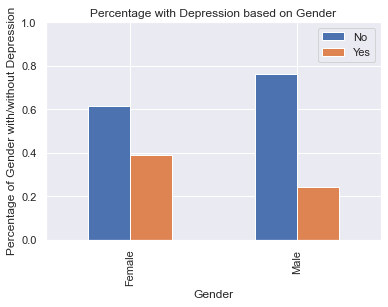

In [70]:
t.plot.bar()
plt.legend(loc='upper right')
plt.title('Percentage with Depression based on Gender')
plt.xlabel("Gender")
plt.ylabel("Percentage of Gender with/without Depression")
plt.ylim([0,1])
plt.show()

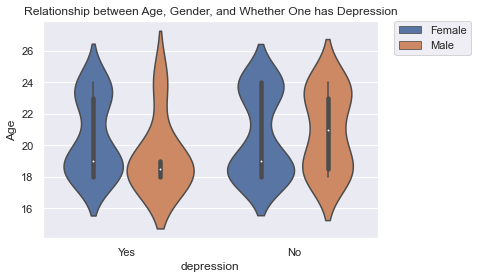

In [72]:
# violin plot of age depending on depression and gender
sns.violinplot(x="depression", y='Age', hue='Gender', data=df)
plt.title('Relationship between Age, Gender, and Whether One has Depression')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [77]:
medage_male_dep = df[(df["Gender"] == 'Male')&(df["depression"] == "Yes")]['Age'].median()
medage_fem_dep = df[(df["Gender"] == 'Female')&(df["depression"] == "Yes")]['Age'].median()
medage_male_nd = df[(df["Gender"] == 'Male')&(df["depression"] == "No")]['Age'].median()
medage_fem_nd = df[(df["Gender"] == 'Female')&(df["depression"] == "No")]['Age'].median()
print('median age for males with depression:',medage_male_dep)
print('median age for females with depression',medage_fem_dep)
print('median age for males without depression',medage_male_nd)
print('median age for females without depression',medage_fem_nd)

median age for males with depression: 18.5
median age for females with depression 19.0
median age for males without depression 21.0
median age for females without depression 19.0


Based on the histogram that visualizes the percentage of university students with or without depression based on gender, we can see that females have a higher percentage with depression of about 38.7 percenage compared to males with depression of about 24 percent. Next, we compared the distribution of ages based on gender and whether one has depression using the violinplots and the median age summary statistics for each of the four groups, we found that of the people who are depressed, the median ages are slightly greater for women compared to men with values 19 and 18.5 respectively. This difference is not much however. The spread for females is much greater when looking at Q1-Q3 so it's hard to compare the two. One noticeable difference is that males without depression have a median age of 21 which is greater compared to those with depression and females without depression. Females seem to not differ much in age distribution whether they have depression or not. However, for males, it seems that those who have depression are younger than those who reported to not have depression.

## 3. Inference

Is there an association between depression and gender in my population of all university students?

Hypothesis test to see if there is an association between having depression and gender:

Ho : p_female − p_male = 0\
HA : p_female − p_male ≠ 0

Assumptions:
1. Sample of females is randomly selected and 75 < 10% of all depressed women (MET)
2. Sample of males is randomly selected and 25 < 10% of all depressed women (MET)
3. Female: n1(p1_hat) = 29 > 10 | n1(1-p1_hat) = 46 > 10 (MET)
4. Male: n2(p2_hat) = 6 < 10 | n2(1-p2_hat) = 19 > 10 (NOT MET)
5. Sample of males and females are independent of each other.

Due to the fact that 6 depressed males is less than 10, the independence condition is not met and therefore we must make inferences with caution.

In [34]:
pd.crosstab(df['Gender'], df['depression'])

depression,No,Yes
Gender,,
Female,46,29
Male,19,6


In [35]:
df_female = df[df['Gender'] == "Female"]
df_male = df[df['Gender'] == "Male"]
phat_female = df_female['depression'].value_counts(normalize=True)[1]
phat_male = df_male['depression'].value_counts(normalize=True)[1]
print("p-hat female:", round(phat_female,4), "| p-hat male:", phat_male)

p-hat female: 0.3867 | p-hat male: 0.24


In [40]:
# check for conditions
n_fem = df_female.shape[0]
n_male = df_male.shape[0]
print(n_fem*(phat_female))
print(n_fem*(1-phat_female))
print(n_male*(phat_male))
print(n_male*(1-phat_male))

29.0
46.0
6.0
19.0


In [41]:
phat = (6 + 29) / (46 + 29 + 19 + 6) # from table above
test_stat = (phat_female - phat_male - 0) / np.sqrt(phat * (1 - phat) * ((1/n_fem) + (1/n_male)))
test_stat

1.3315005718713655

In [43]:
pval = 2*(1-norm.cdf(test_stat))
print('pvalue:' , pval)

pvalue: 0.1830243569513792


With a p-value of 0.18 is greater than most reasonable significant levels. I would fail to reject the null hypothesis because there is not enough evidence to suggest that the proportion of females who are depressed is the NOT the same as the proportion of males who are depressed. We can infer that for our population of all university students, there is no difference between the depression rates across the two genders.

## 4. Linear Regression

Is there a linear relationship between a student's age and their gender, marital status, whether he/she has depression, anxiety, or panic attack?

In [225]:
results = smf.ols('Age ~ Gender+Married+depression+anxiety+panic_attack', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8835
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.495
Time:                        12:24:41   Log-Likelihood:                -230.58
No. Observations:                 100   AIC:                             473.2
Df Residuals:                      94   BIC:                             488.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.6946      0.395     52.364      0.000      19.910      21.479
Gender[T.Male]         -0.0551      0.588     -0.094      0.925      -1.222       1.112
Married[T.Yes]          1.4328      0.866      1.655      0.101      -0.286       3.152
depression[T.Yes]      -1.0115      0.689     -1.469      0.145      -2.379       0.356
anxiety[T.Yes]         -0.3330      0.555     -0.600      0.550      -1.435       0.769
panic_attack[T.Yes]     0.2641      0.557      0.474      0.636      -0.842       1.370
==============================================================================
Omnibus:                      349.558   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.651
Skew:                           0.325   Prob(JB):                      0.00295
Kurtosis:                       1.459   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

predicted age = (20.6946)+(-0.0551)(Male)+(1.4328)(Married)+(-1.0115)(depression)+(-0.3330)(anxiety) +(0.2641)(panic_attack)

where male, married, depression, and anxiety all take on values of either 1 or 0 depending on whether the student is male, married, has depression, has axiety or not, respectively.

In order to check the conditions for linear regression, there are five conditions to check. The first is the linearity condition. The second is the constant variability of residuals condition. The third is the normality of residuals centered around 0 condition. The fourth is the independence of residual condition, and the fifth no multicollinearity condition.

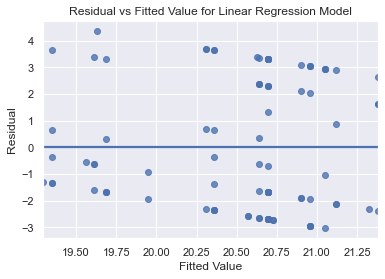

In [236]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.title('Residual vs Fitted Value for Linear Regression Model')
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

As we move from the left to the right, we check for even distribution of points in the plot above and below the line. On the right hand side, we can see that the points are evenly distributed above and below the line; however, to the left, we can see that the points are not evenly distibuted and are rather shifted more above the line than below. However, there are similiar number of points above and below the line. Overall, the linearity condition is met.

For constant variability of residuals, we check for a constant spread of points as we move from the left to the right. In this case, if we were to draw a line, one above and one below the line of best fit, we can see that both lines are slanted downwards; therefore, there is not constant variability.

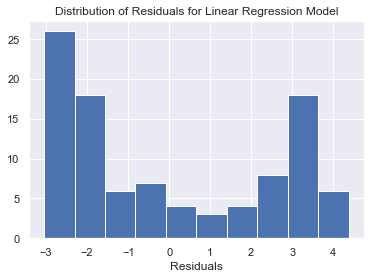

In [237]:
plt.hist(results.resid)
plt.title('Distribution of Residuals for Linear Regression Model')
plt.xlabel('Residuals')
plt.show()

Because the distribution of residuals is bimodal with a peak at around -3 and a peak around 3, this is clearly not unimodal nor can it be symmetric. Therefore, the assumption that the residuals are normally distributed is not met.

For the independence of residuals, we have to check that the data is randomly sampled and that the sample size is less than 10 percent of the population size. I am not completely sure which university students the survey was taken from but we can reasonably assume that this is a random sample. We do know that 100 students is much less than 10 percent of all university students. I are not completely sure if the independence holds due to the random sampling component of the condition; however, for the purposes of this analysis, I will assume random sampling so independence holds.

For the no multicollinearity condition, all of our explanatory variables are categorical; therefore, we do not need to check this condition. In addition, since all of our explanatory variables are categorical, it doesn't make sense to transform one of the variables with natural log.

In [240]:
results.rsquared

0.044886764929747414

Since the r squared value is about 0.045, 4.5% of the variability in the university student's age is explained by this model, which is relatively low.

In [242]:
results.predict(exog=dict(Gender='Male', Married='Yes', depression='No', anxiety='Yes', panic_attack='No'))

0    21.739333
dtype: float64

The linear regression model predicts that the estimated/predicted age of a married male university student without depression or panic attacks but with anxiety is about 21.74 years of age (or between 21-22 years).

We do not have sufficient evident to state that any of the slopes corresponding to the predictor variables to be non-zero because all 95 percent confidence interval (significance level 0.05) all contain 0.00 since they range from a negative value to a positive value. This means that we fail to reject the null hypothesis which states that all of the slopes are equal to zero.

In conclusion, there appears to be no apparent relationship between between a student's age and their gender, marital status, and whether they have depression, anxiety, or panic attack.

## 4. Logistic Regression

In [202]:
df['depression'].value_counts()

No     65
Yes    35
Name: depression, dtype: int64

In [203]:
# Turn the two-level categorical response variable into numerical variable
df['Depression']=df['depression'].map({'No':0,'Yes':1})
df.head()

,Timestamp,Gender,Age,Major,Year,cGPA,Married,depression,anxiety,panic_attack,treatment,Depression
0,8/7/2020 12:02,Female,18.0,Engineering,Year 1,3.00 - 3.49,No,Yes,No,Yes,No,1
1,8/7/2020 12:04,Male,21.0,Islamic education,Year 2,3.00 - 3.49,No,No,Yes,No,No,0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,1
3,8/7/2020 12:06,Female,22.0,Laws,Year 3,3.00 - 3.49,Yes,Yes,No,No,No,1
4,8/7/2020 12:13,Male,23.0,Mathemathics,Year 4,3.00 - 3.49,No,No,No,No,No,0


In [204]:
# Split data into training and testing data sets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                   test_size=0.20, 
                                   random_state=123)

In [205]:
df_train.shape[0]/df.shape[0]

0.8

Logistic Regression Research Question: Is there a linear relationship between whether or not a student has depression and their gender, age, year in school, and whether they have anxiety in our sample? How does this give us insight into the population sample?

In [206]:
# Now use the df_train to fit the logistic model with the four predictor variables
mod4v = smf.logit(formula='Depression ~ Gender+Age+Year+anxiety', data=df_train).fit()
print('AIC of Full Model',mod4v.aic)

Optimization terminated successfully.
         Current function value: 0.575106
         Iterations 6
AIC of Full Model 106.01689002700664


In [207]:
mod3v1 = smf.logit(formula='Depression ~ Gender+Age+Year', data=df_train).fit()
print('AIC of Test Model that Deletes ANXIETY from the Current Model',mod3v1.aic)

Optimization terminated successfully.
         Current function value: 0.601386
         Iterations 6
AIC of Test Model that Deletes ANXIETY from the Current Model 108.22169753112864


In [208]:
mod3v2 = smf.logit(formula='Depression ~ Gender+Year+anxiety', data=df_train).fit()
print('AIC of Test Model that Deletes AGE from the Current Model',mod3v2.aic)

Optimization terminated successfully.
         Current function value: 0.584375
         Iterations 6
AIC of Test Model that Deletes AGE from the Current Model 105.50003180822256


In [209]:
mod3v3 = smf.logit(formula='Depression ~ Gender+Age+anxiety', data=df_train).fit()
print('AIC of Test Model that Deletes YEAR from the Current Model',mod3v3.aic)

Optimization terminated successfully.
         Current function value: 0.600822
         Iterations 5
AIC of Test Model that Deletes YEAR from the Current Model 104.13144107916854


In [210]:
mod3v4 = smf.logit(formula='Depression ~ Year+Age+anxiety', data=df_train).fit()
print('AIC of Test Model that Deletes GENDER from the Current Model',mod3v4.aic)

Optimization terminated successfully.
         Current function value: 0.596284
         Iterations 6
AIC of Test Model that Deletes GENDER from the Current Model 107.40549199510049


Because there was at least one "test model" that has a AIC score (104.13) that is lower than the AIC score of the full model (106.02), we continue with a new iteration.

The "test model" that had the lowest BIC score was the one that deleted the "sample" explanatory variable from the "current model". So we set the new "current model" to be the test model that does not include "sample" and go through another iteration. mod3v3 is now the current model.

In [214]:
mod2v1 = smf.logit(formula='Depression ~ Gender+Age', data=df_train).fit()
print('AIC of Test Model that Deletes ANXIETY from the Current Model',mod3v3.aic)

Optimization terminated successfully.
         Current function value: 0.627798
         Iterations 5
AIC of Test Model that Deletes ANXIETY from the Current Model 104.13144107916854


In [215]:
smf.logit(formula='Depression ~ Gender+anxiety', data=df_train).fit()
print('AIC of Test Model that Deletes AGE from the Current Model',mod3v3.aic)

Optimization terminated successfully.
         Current function value: 0.609691
         Iterations 5
AIC of Test Model that Deletes AGE from the Current Model 104.13144107916854


In [216]:
smf.logit(formula='Depression ~ Age+anxiety', data=df_train).fit()
print('AIC of Test Model that Deletes GENDER from the Current Model',mod3v3.aic)

Optimization terminated successfully.
         Current function value: 0.613327
         Iterations 5
AIC of Test Model that Deletes GENDER from the Current Model 104.13144107916854


Note that the AIC of the new iteration of test models does not change; therefore, we stop the algorithm. The mod3v3 that represents the model with "Year" deleted from the full model. What this means is that the final model with just gender, age, and anxiety as explanatory variables is more parsimonious than the model with gender, age, anxiety, and year because this final model had a lower BIC score.

**However, I do not know for sure that the model with sex, age, and party has the LOWEST BIC score out of all possible $2^4=16$ possible models combinations that use (or do not use) the four possible explanatory variables that we originally considered!**

In [217]:
mod3v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                   80
Model:                          Logit   Df Residuals:                       76
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                 0.07201
Time:                        12:07:35   Log-Likelihood:                -48.066
converged:                       True   LL-Null:                       -51.796
Covariance Type:            nonrobust   LLR p-value:                   0.05859
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.5977      2.077      0.769      0.442      -2.472       5.668
Gender[T.Male]    -0.7999      0.584     -1.369      0.171      -1.945       0.345
anxiety[T.Yes]     1.0521      0.512      2.055      0.040       0.049       2.056
Age               -0.1173      0.100     -1.178      0.239      -0.312       0.078
==================================================================================
"""

I used the train dataset with n=80 to fit the model. There is a linear relationship between the log odds of a university student having depression and their age, gender, whether they have anxiety or not in college. Let y_hat represent the log odds of a unversity student having depression. The logistic regression model states that:

y_hat = (1.5977)+(-0.7999)(Male)+(1.0521)(Anxiety)+(-0.1173)(Age)

There is sufficient evidence that the slope for whether or not the university student has anxiety is not equal to zero. This is because the 95 percent confidence interval does not contain 0.00. (Check how to do this)

In [218]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [219]:
df_test['phat_test'] = mod3v3.predict(exog=df_test)
df_test.head()

<ipython-input-219-19e84cc62b72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['phat_test'] = mod3v3.predict(exog=df_test)


,Timestamp,Gender,Age,Major,Year,cGPA,Married,depression,anxiety,panic_attack,treatment,Depression,phat_test
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No,0,0.347336
71,8/7/2020 21:21,Female,18.0,Laws,Year 3,3.50 - 4.00,No,No,No,Yes,No,0,0.374378
83,13/07/2020 10:12:28,Female,19.0,Pendidikan Islam,Year 2,3.00 - 3.49,No,No,No,No,No,0,0.347336
28,8/7/2020 13:58,Female,24.0,BIT,Year 3,3.50 - 4.00,Yes,Yes,Yes,Yes,Yes,1,0.458821
64,8/7/2020 17:46,Female,24.0,Engine,Year 1,3.50 - 4.00,No,No,No,No,No,0,0.228428


0.6758241758241758


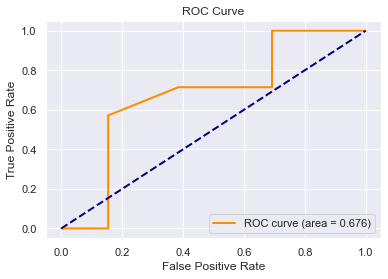

In [220]:
fpr, tpr, score = roc_curve(y_true=df_test['Depression'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['Depression'], y_score=df_test['phat_test'])
print(auc)
plot_roc(fpr, tpr, auc)

In [221]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

In [222]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['Depression'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr  fpr
0       0.07  1.0  1.0
   threshold  tpr  fpr
0       0.08  1.0  1.0
   threshold  tpr  fpr
0       0.09  1.0  1.0
   threshold  tpr  fpr
0        0.1  1.0  1.0
   threshold  tpr  fpr
0       0.11  1.0  1.0
   threshold  tpr  fpr
0       0.12  1.0  1.0
   threshold  tpr  fpr
0       0.13  1.0  1.0
   threshold  tpr       fpr
0       0.14  1.0  0.923077
   threshold  tpr       fpr
0       0.15  1.0  0.923077
   threshold  tpr       fpr
0       0.16  1.0  0.923077
   threshold  tpr       fpr
0       0.17  1.0  0.923077
   threshold  tpr       fpr
0       0.18  1.0  0.923077
   threshold  tpr       fpr
0       0.19  1.0  0.923077
   threshold  tpr   

We want a high tpr (true positive rate) close to 1 and a low fpr (false positive rate) close to zero. From the graph, this is around where tpr is close to 0.7 and fpr is close to 0.4. This corresponds to a threshold of around 0.35 where tpr is 0.714286 and fpr is 0.384615. I chose this given my research goals of identifying students at risk of depression. We don't want our tpr as high as we can without having an extreme fpr so I chose the point where tpr is close to 0.7 and fpr is close to 0.4 rather than the point where tpr is close to 0.57 and the false positive rate is close to 0.15 because it is more important to correctly identity depressed students than to falsely identify a student as depressed.

In [223]:
df_test['yhat']=1*(df_test['phat_test']>0.35)
df_test.head()

<ipython-input-223-abef15353955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['yhat']=1*(df_test['phat_test']>0.35)


,Timestamp,Gender,Age,Major,Year,cGPA,Married,depression,anxiety,panic_attack,treatment,Depression,phat_test,yhat
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No,0,0.347336,0
71,8/7/2020 21:21,Female,18.0,Laws,Year 3,3.50 - 4.00,No,No,No,Yes,No,0,0.374378,1
83,13/07/2020 10:12:28,Female,19.0,Pendidikan Islam,Year 2,3.00 - 3.49,No,No,No,No,No,0,0.347336,0
28,8/7/2020 13:58,Female,24.0,BIT,Year 3,3.50 - 4.00,Yes,Yes,Yes,Yes,Yes,1,0.458821,1
64,8/7/2020 17:46,Female,24.0,Engine,Year 1,3.50 - 4.00,No,No,No,No,No,0,0.228428,0


In [224]:
confusion_matrix(y_true=df_test['Depression'], y_pred=df_test['yhat'])
tn, fp, fn, tp = confusion_matrix(y_true=df_test['Depression'], 
                                  y_pred=df_test['yhat']).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
print('tpr:',tpr)
print('fpr:',fpr)

tpr: 0.7142857142857143
fpr: 0.38461538461538464


## 6. Conclusion

For the the relationship between depression and gender in the dataset, I found that... Furthermore, the relationship between depression and gender change for different values of ages in the dataset...

For the inference section, I found that there is not enough evidence to state that there an association between depression and gender in the population of all university students.

Through the linear regression analysis, I found that there is not a relationship between a student's age and his/her marital status and whether he/she has depression, axiety, or panic attack.

Through the logistic regression analysis, which found a model using the backward elimination algorithm. This logistic model demonstrated that there is there a linear relationship between the log odds of whether or not a university student has depression and whether they have anxiety; however, there is not enough evidence to state that there is a linear relationship between the the log odds of whether or not a university student has depression and the student's age and gender, which are part of the final model in the backwards elimination algorithm.

Future Work: If I was to conduct future work based on these analyses, I would gather a greater sample size, noting which universities these students come from in order to ensure an independent random sample. I would also add more insightful questions to the survey such as someone's socioeconomic background, family history of mental illness, history of chilhood abuse/trauma, and their race or ethnicity. Since these are known factors that affect mental illness, we can see if there is a trend amongst university students. Another thing to note is that the survey from this dataset was taken in 2020, as noted in the timestamps. This is during the beginning or the COVID pandemic when the lockdown was prevalent and enforced; therefore, this could have influenced the mental health issues in students due to the isolation. It would be interesting to compare a new survey with this survey to see if there are any differences.